# Python Workshop 8

November 1, 2017

## Time Series

In the last workshop we reviewed how to create a time series
by using timestamps for the index.  We used the
`pd.date_range` function like in the example below.

In [1]:
import numpy as np
import pandas as pd
ts = pd.Series(np.random.poisson(100, 20),
               index = pd.date_range(end='2017-12-31', periods=20))
ts.head()

2017-12-12     90
2017-12-13    100
2017-12-14    116
2017-12-15     94
2017-12-16     85
Freq: D, dtype: int64

The above time series simulates a Poisson process that averages
`100` counts per day over `20` days ending on December 31, 2017.
We can see that the time series frequency defaults to **days**.
This is further confirmed in the output above, `Freq: D`.  The
`D` means **days**.

### Frequencies

We can override the default to specify other indices.  `freq='B'`
means *business days*.

In [2]:
pd.date_range(end='2017-12-31', periods=20, freq='B')

DatetimeIndex(['2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', freq='B')

Even though we specified an end date of `2017-12-31`, since that is a
Sunday and we specified *business days*, the actual end date is
`2017-12-29`.

End of month is specified with `freq='M'`.

In [3]:
pd.date_range(end='2017-12-31', periods=20, freq='M')

DatetimeIndex(['2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

Business month end (the last business day of each month) is
`freq='BM'`.

In [4]:
pd.date_range(end='2017-12-31', periods=20, freq='BM')

DatetimeIndex(['2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29'],
              dtype='datetime64[ns]', freq='BM')

Specific days of the week begin with `W-` followed by the day.
The last 20 Wednesdays would be `freq='W-WED'`.

In [5]:
pd.date_range(end='2017-12-31', periods=20, freq='W-WED')

DatetimeIndex(['2017-08-16', '2017-08-23', '2017-08-30', '2017-09-06',
               '2017-09-13', '2017-09-20', '2017-09-27', '2017-10-04',
               '2017-10-11', '2017-10-18', '2017-10-25', '2017-11-01',
               '2017-11-08', '2017-11-15', '2017-11-22', '2017-11-29',
               '2017-12-06', '2017-12-13', '2017-12-20', '2017-12-27'],
              dtype='datetime64[ns]', freq='W-WED')

LAJIS meetings occur on the first Thursday of each month.
The frequence code for this is **WOM** for Week Of Month.
The "first Thursday" is `1Thu`.

In [6]:
pd.date_range(end='2017-12-31', periods=20, freq='WOM-1THU')

DatetimeIndex(['2016-05-05', '2016-06-02', '2016-07-07', '2016-08-04',
               '2016-09-01', '2016-10-06', '2016-11-03', '2016-12-01',
               '2017-01-05', '2017-02-02', '2017-03-02', '2017-04-06',
               '2017-05-04', '2017-06-01', '2017-07-06', '2017-08-03',
               '2017-09-07', '2017-10-05', '2017-11-02', '2017-12-07'],
              dtype='datetime64[ns]', freq='WOM-1THU')

The available base frequencies can be prefixed by a multiplier.
Every other Wednesday is `freq='2W-WED'`.

In [7]:
pd.date_range(end='2017-12-31', periods=10, freq='2W-WED')

DatetimeIndex(['2017-08-23', '2017-09-06', '2017-09-20', '2017-10-04',
               '2017-10-18', '2017-11-01', '2017-11-15', '2017-11-29',
               '2017-12-13', '2017-12-27'],
              dtype='datetime64[ns]', freq='2W-WED')

### Shifting

Time series shifting is performed with the `shift` method.
With only one parameter, the `shift` method leaves the index alone.
This leaves the entry `NaN` when an entry is shifted away.

In [8]:
ts = pd.Series(np.random.poisson(60, 4),
               pd.date_range('2017-10-18', periods=4, freq='2W-WED'))
ts

2017-10-18    42
2017-11-01    59
2017-11-15    62
2017-11-29    61
Freq: 2W-WED, dtype: int64

In [9]:
ts.shift(1)

2017-10-18     NaN
2017-11-01    42.0
2017-11-15    59.0
2017-11-29    62.0
Freq: 2W-WED, dtype: float64

In [10]:
ts.shift(-2)

2017-10-18    62.0
2017-11-01    61.0
2017-11-15     NaN
2017-11-29     NaN
Freq: 2W-WED, dtype: float64

In [11]:
ts.shift(2).shift(-2)

2017-10-18    42.0
2017-11-01    59.0
2017-11-15     NaN
2017-11-29     NaN
Freq: 2W-WED, dtype: float64

By including a `freq` parameter, we also change the index.

In [12]:
ts.shift(1, freq='D')

2017-10-19    42
2017-11-02    59
2017-11-16    62
2017-11-30    61
Freq: 2W-THU, dtype: int64

By default, these dates have midnight for the time.
But we can shift by times also.

In [13]:
ts.shift(1, freq='90T')

2017-10-18 01:30:00    42
2017-11-01 01:30:00    59
2017-11-15 01:30:00    62
2017-11-29 01:30:00    61
Freq: 2W-WED, dtype: int64

The `T` is a short-cut for `MIN`.

We can apply this shifting to individual instances
of a date/time.  For this we refer to the offset types
in the `pandas.tseries.offsets` package.

[Offset Object Names](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) - Pandas API



In [14]:
from pandas.tseries.offsets import Week, BusinessMonthEnd
from datetime import datetime

now = datetime.now()
Week().rollforward(now)

Timestamp('2017-11-08 09:15:45.871166')

In [15]:
(BusinessMonthEnd().rollback(now).normalize(), 
 BusinessMonthEnd().rollforward(now).normalize())

(Timestamp('2017-10-31 00:00:00'), Timestamp('2017-11-30 00:00:00'))

`BusinessMonthEnd` is a special kind of offset called an **anchored offset**.

## Iterators, Iterables, and Generators

We all have a general idea of what an iterator is.
Python has  **iterators** and **iterables**.  Because
they sound similar, it's easy to confuse one with the
other.  An **iterator** is a Python object on which
you can call the `next` function repeatedly to retrieve
a sequence of the object's values.  When the values are
exhausted, the `next` function throws **StopIteration**.

**Iterable** is an adjective.  It applies to Python objects
for which the built-in function `iter` returns an interator.
Of course, that description simply begs the next question:
for which objects does `iter` return an iterator?  The
`iter` function

1. Checks for the `__iter__` method on the class.

2. If the object does not support the `__iter__` method,
   check for the `__getitem__` method.

3. If none of these methods are implemented, raise `TypeError`.

For now, let's get a feel for the difference between
iterators and iterables.  A list is **not** an interator.

In [16]:
x = [1, 2, 3]
next(x)

TypeError: 'list' object is not an iterator

However, a list **is** iterable.

In [17]:
xit = iter(x)
next(xit)

1

In [18]:
next(xit)

2

In [19]:
next(xit)

3

In [20]:
next(xit)

StopIteration: 

We can see it returned a sequence of elements and then
raised `StopIteration` when there was nothing left.

We rarely have to call `next` ourselves directly.  Most
Python looping structures do this for us automatically
behind the scenes.  For example,
the interpreter is doing this for us:

In [21]:
xit = iter(x)
try:
    while True:
        y = next(xit)
        print(y)
except StopIteration:
    pass

1
2
3


when we code this:

In [22]:
for y in x:
    print(y)

1
2
3


Let's say we want to write our own range function that
returns the numbers 1, 2, ..., `n` given `n` (instead
of 0, 1, ..., `n-1`).  Enter the following code into
a file named `myrange.py`.  This file should be in the
same directory from which you launched your IPython session.
Keep your editor open; we'll be making changes soon.
But make sure you save what is listed below.

In [23]:
def myrg(n):
    return [i+1 for i in range(n)]

To make the `myrg` function available in your IPython session,
execute the following *magic* command.

```
%run myrange.py
```

You shouldn't see anything happen because we simply defined a
function.  We haven't executed it yet.  Let's do that now.

In [24]:
myrg(4)

[1, 2, 3, 4]

We see that a list returned just like we expected.
We can use this for iterating three times.

In [25]:
for x in myrg(3):
    print(x)

1
2
3


This is all good for small numbers.  But what if we wanted to
loop 50,000,000,000 times?  We incur the cost of creating a
list with 50,000,000,000 entries just to keep track of iteration.

An iterator would help here.  It would hold an integer and
increment it each time before returning it with the `next`
function call.  Python provides a nice command for making
this easy: the **yield** statement.

Change our `myrange.py` function to use `yield`.

In [26]:
def myrg(n):
    i = 1
    while i <= n:
        yield i
        i += 1

This function looks strange without a `return` statement.
It returns each time `yield` is encountered.  It picks up after
the yield the next time `next` is called on it.  If there are
no more `yield` statements to call, `StopIteration` is raised.

A function which employs `yield` is called a **generator**.

In [27]:
myrg(3)

<generator object myrg at 0x10c6d0fc0>

In [28]:
for x in myrg(3): print(x)

1
2
3


This does not incur the expense of creating a list.
Elements are provided only when they are needed.
Of course, if you want a list, there is always the
list-comp.

In [29]:
[x for x in myrg(3)]

[1, 2, 3]

## Grouping

A grouping is generally a list of values as long as the number of rows
in a dataset.  Items in this list with the same value are in the same group.
There are three common ways to create such a grouping list.

1. Compute or generate the list
2. Use a column of values from the data frame (this will automatically
   have the correct length).
3. Apply some function to the axis index to generate the values.

Let's take a quick review of groupings using the `ChickWeight.csv`
dataset that is a standard sample included with most R installations.

In [30]:
cw = pd.read_csv('ChickWeight.csv')
cw.head(10)

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
5,93,10,1,1
6,106,12,1,1
7,125,14,1,1
8,149,16,1,1
9,171,18,1,1


There is a collection of chicks.  Each chick is assigned
one of four diets.  Every two days, the weight of each
chick is recorded.  This results in four columns.

* `Chick` - the baby chick ID
* `Diet`  - the diet ID (1, 2, 3, or 4)
* `Time`  - two day intervals
* `Weight` - the weight of a chick on a certain diet and day.

We obtain groupings on a data frame using the `groupby`
method.  The input is an array of all the columns that
must be held constant for a single group.  Let's try this for
the `ChickWeight` dataset by grouping all weights that
have the

* same `Time`
* same `Diet`

In [31]:
grp = cw.groupby(['Time', 'Diet'])

The output is an
intermediate result to which one applies a *summary function*.
Summary functions are usually quantitative summaries such as
`mean`, `min`, `max`, `count`, `sd`, etc.  One can assign
the intermediate grouping to its own variable and reuse it
across mutliple summaries.

In [32]:
grp.mean().head(10)

weight      Chick
Time Diet                      
0    1     41.400000  10.500000
     2     40.700000  25.500000
     3     40.800000  35.500000
     4     41.000000  45.500000
2    1     47.250000  10.500000
     2     49.400000  25.500000
     3     50.400000  35.500000
     4     51.800000  45.500000
4    1     56.473684  10.105263
     2     59.800000  25.500000

We can see that the `groupby` method gathered all rows
with the same `Time` and `Diet` values.
**These become the new index**.  The rest of the
**numeric** columns are determined by the summary function.
The left over numeric columns in this case were `weight`
and `Chick`.  `Chick` is not strictly numeric.  The value
represents an identifier, not a quantitative measurement.
It's good to filter on just the columns for which the 
summary function makes sense.

In [33]:
grp['weight'].mean().head(10)

Time  Diet
0     1       41.400000
      2       40.700000
      3       40.800000
      4       41.000000
2     1       47.250000
      2       49.400000
      3       50.400000
      4       51.800000
4     1       56.473684
      2       59.800000
Name: weight, dtype: float64

For each time, we have four diets stacked.
We can use the `unstack` method to *pivot* the inner most
index, the `Diet` component, into columns.

In [34]:
grp['weight'].mean().unstack().head(10)

Diet,1,2,3,4
Time,,,,
0,41.400000,40.7,40.8,41.0
2,47.250000,49.4,50.4,51.8
4,56.473684,59.8,62.2,64.5
6,66.789474,75.4,77.9,83.9
8,79.684211,91.7,98.4,105.6
10,93.052632,108.5,117.1,126.0
12,108.526316,131.3,144.4,151.4
14,123.388889,141.9,164.5,161.8
16,144.647059,164.7,197.4,182.0


The implied input value to `unstack` is the inner most index
column; in this case `unstack(1)`.  If we override this with
the left most index column `0`, we transpose the result.

In [35]:
grp['weight'].mean().unstack(0)

Time,0,2,4,6,8,10,12,14,16,18,20,21
Diet,,,,,,,,,,,,
1,41.4,47.25,56.473684,66.789474,79.684211,93.052632,108.526316,123.388889,144.647059,158.941176,170.411765,177.750000
2,40.7,49.40,59.800000,75.400000,91.700000,108.500000,131.300000,141.900000,164.700000,187.700000,205.600000,214.700000
3,40.8,50.40,62.200000,77.900000,98.400000,117.100000,144.400000,164.500000,197.400000,233.100000,258.900000,270.300000
4,41.0,51.80,64.500000,83.900000,105.600000,126.000000,151.400000,161.800000,182.000000,202.900000,233.888889,238.555556


In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

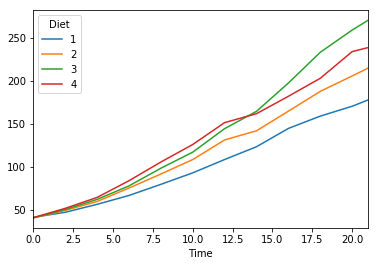

In [37]:
cwus = cw.groupby(['Time', 'Diet'])['weight'].mean().unstack(1)
cwus.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f0f3390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11265c0b8>], dtype=object)

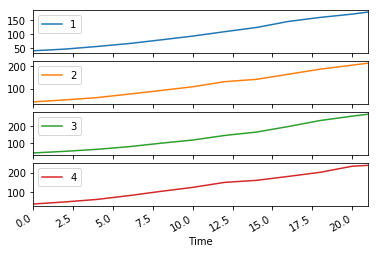

In [38]:
cwus.plot(subplots=True)

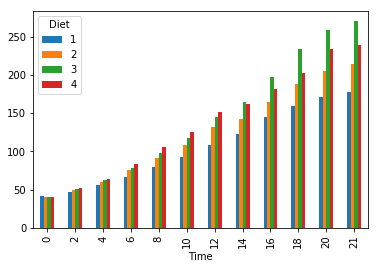

In [39]:
cwus.plot.bar()

In the case where a single categorical variable
defines the grouping, there are summary plots that
allow one to visually render each group.
Let's use the `InsectSprays.csv` dataset to review
some of these using the Seaborn module.

In [40]:
sprays = pd.read_csv('InsectSprays.csv')
sprays.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


Each spray undergoes several experiences for insect
irradication.  This results in a spread of counts.

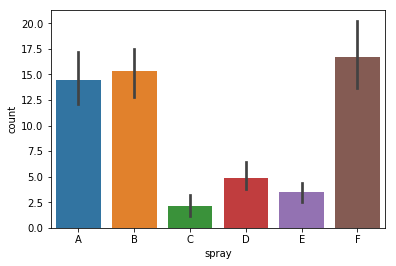

In [41]:
sns.barplot(x='spray', y='count', data=sprays)

For each spray (the `x`-axis), a bar rendered with a height
equal to the average of the values.  The vertical black line
represents the `95%` confidence interval (the default)
which is based on the spread of the values.  This says that
if we do the experiment many many times, 19 out of 20 times
the verical bar will cover the true mean.
If we insist on 99% assurance, the intervals get bigger.

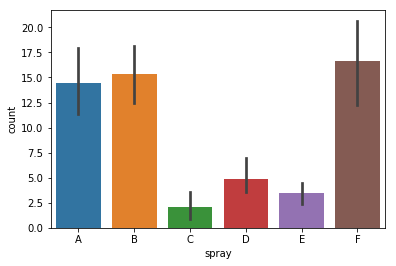

In [42]:
sns.barplot(x='spray', y='count', data=sprays, ci=99)

The `boxplot`, shown below, is another way to display
the spread of values. The horizontal line across each
box represents the mean of that group.
The lower and upper boundaries of the box represent
the 25% and 75% quartiles respectively.

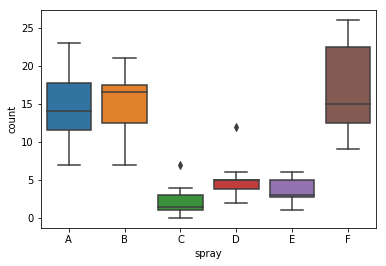

In [43]:
sns.boxplot(x='spray', y='count', data=sprays)

The "wiskers" are a bit more complicated.  In most cases,
they represent the minimum and maximum.  But if either
of these values is more than 1.5 times the
*interquartile range* (IQR) (the distance between the
upper and lower end of the box), then those are shown
separately as dots (like with sprays `C` and `D` above)
and the wiskers take on the next most extreme value.
(If that's too much to take in, just enjoy the pretty colors).

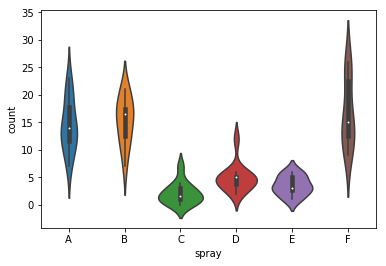

In [44]:
sns.violinplot(x='spray', y='count', data=sprays)

The violin plots vary the thickness of the box to convey the
distribution of the values.

---------------------------------
End of Workshop 8